In [1]:
# Wordle AI Solver Notebook

# This notebook runs the Wordle AI logic from `main.py`.

# **Important:** This AI is designed for **5-letter words** based on the provided code and word lists.

# **Setup:** Make sure this notebook (`Test1.ipynb`) is located in the same directory as `main.py`, `words.txt`, and `wordsAllowed.txt`.

In [2]:
## Mode 1: Automatic AI vs. Random Word

# This mode simulates the AI playing against a randomly chosen target word from `words.txt`. It uses the `test_highestFrequency` function from `main.py` (which we import as `gameEngine`).

# Change the number inside `test_highestFrequency()` to run more simulations (e.g., `test_highestFrequency(10)`).

In [3]:
import main as gameEngine
import random

# Reload the word lists in case they were modified by other cells/runs
gameEngine.available_words = [i[:-1] for i in open("words.txt", "r").readlines()]
gameEngine.permanent_answers = [i[:-1] for i in open("words.txt", "r").readlines()]
gameEngine.wordsAllowed = [i[:-1] for i in open("wordsAllowed.txt", "r").readlines()]

print("Running 1 automatic game simulation...")
# The test_highestFrequency function already prints its results
gameEngine.test_highestFrequency(1)

print("\nSimulation complete.")

Running 1 automatic game simulation...

--- Starting Verbose Test Run (1 games) ---

--- Game 1 ---
Target Word: humor
Guess 1: salet -> BBBBB
  Remaining possible words: 221
Guess 2: irony -> BYYBB
  Remaining possible words: 11
Guess 3: humor -> GGGGG
Solved in 3 steps!
Guess History for game 1: ['salet', 'irony', 'humor']

--- Overall Results ---
Method: highest_freq
Total Games Simulated: 1
Results (Steps: Count): {'1': 0, '2': 0, '3': 1, '4': 0, '5': 0, '6': 0, 'DNF': 0}
Success Rate: 1.0000
Average Steps (for successful games): 3.0000

Simulation complete.


In [4]:
# ## Mode 2: AI vs. User-Defined Word

# In this mode, you provide a specific 5-letter target word (which must be a valid potential answer from `words.txt`), and the AI will attempt to guess it.

# We'll define a helper function `solve_specific_word` based on the logic in `test_highestFrequency`.

In [5]:
import main as gameEngine
import random
import math # Needed for isBlimp logic

# --- Ensure this function is defined either in main.py or in a cell ABOVE this one ---
def get_guess_colors(guess, target_word):
    """
    Compares a guess to the target word and returns a string representing
    Wordle colors (G=Green, Y=Yellow, B=Black/Gray).
    Handles duplicate letters correctly.
    """
    if len(guess) != 5 or len(target_word) != 5:
        return "Error" # Should not happen

    colors = [''] * 5  # Initialize with placeholders
    target_list = list(target_word) # Mutable list to track used letters

    # First pass for Greens (Exact Matches)
    for i in range(5):
        if guess[i] == target_list[i]:
            colors[i] = 'G'
            target_list[i] = None # Mark this letter as used for green

    # Second pass for Yellows (Present but Wrong Position)
    for i in range(5):
        if colors[i] == '': # Only check letters not already marked Green
            if guess[i] in target_list:
                colors[i] = 'Y'
                # Mark the *first* available instance of this letter in target as used
                target_list[target_list.index(guess[i])] = None
            else:
                # If not Green or Yellow, it must be Black/Gray
                colors[i] = 'B'

    return "".join(colors) # Return as a single string like "BGYBB"
# --- End of get_guess_colors function ---


# --- MODIFIED solve_specific_word function ---
def solve_specific_word(target_word):
    target_word = target_word.lower() # Ensure lowercase
    # --- Validation ---
    if len(target_word) != 5:
        print(f"Error: '{target_word}' is not 5 letters long.")
        return

    # Reload lists each time to ensure clean state
    # Assuming main.py is imported as gameEngine
    initial_word_list = [i[:-1] for i in open("words.txt", "r").readlines()]
    allowed_guesses = [i[:-1] for i in open("wordsAllowed.txt", "r").readlines()]

    if target_word not in initial_word_list:
        print(f"Error: '{target_word}' is not in the list of possible answers (words.txt).")
        return

    # --- Simulation Logic ---
    available_words = initial_word_list[:]
    steps = 0
    guess_history = []

    print(f"Target Word: {target_word}")

    # --- First Guess ---
    guess = "salet"
    steps = 1
    guess_history.append(guess)
    colors = get_guess_colors(guess, target_word) # Get colors
    print(f"Guess {steps}: {guess} -> {colors}") # Print with colors

    if guess == target_word:
        print(f"Solved in {steps} steps!")
        print(f"History: {guess_history}")
        return

    available_words = gameEngine.filter_words(available_words, guess, target_word)
    print(f"  Remaining possible words: {len(available_words)}")
    if target_word not in available_words and len(available_words) > 0:
         print(f"Warning: Target word '{target_word}' was filtered out! List: {available_words[:10]}")

    # --- Subsequent Guesses (Loop) ---
    for j in range(5): # Max 5 more guesses
        if not available_words:
             print("Error: No possible words left in list.")
             steps = -1 # Indicate failure state
             break

        if len(available_words) == 1:
            guess = available_words[0]
        elif gameEngine.isBlimp(available_words):
            print("  (Blimp condition detected)")
            guess = gameEngine.blimpSearch(available_words)
        else:
            guess = gameEngine.getMaxValue1(available_words)

        steps += 1
        guess_history.append(guess)
        colors = get_guess_colors(guess, target_word) # Get colors
        print(f"Guess {steps}: {guess} -> {colors}") # Print with colors

        if guess == target_word:
            print(f"Solved in {steps} steps!")
            print(f"History: {guess_history}")
            return

        available_words = gameEngine.filter_words(available_words, guess, target_word)
        print(f"  Remaining possible words: {len(available_words)}")
        if target_word not in available_words and len(available_words) > 0:
            print(f"Warning: Target word '{target_word}' was filtered out! List: {available_words[:10]}")

    # --- End of Loop ---
    if steps != -1 and guess != target_word:
        print(f"Failed to solve in 6 steps.")
        print(f"History: {guess_history}")
        print(f"Remaining possibilities: {available_words}")

# --- Get User Input and Run ---
user_target = input("Enter the 5-letter target word (must be in words.txt): ")
solve_specific_word(user_target)

Target Word: crack
Guess 1: salet -> BYBBB
  Remaining possible words: 102
Guess 2: acorn -> YYBYB
  Remaining possible words: 8
  (Blimp condition detected)
Guess 3: wimpy -> BBBBB
  Remaining possible words: 1
Guess 4: crack -> GGGGG
Solved in 4 steps!
History: ['salet', 'acorn', 'wimpy', 'crack']


## Mode 3: Full Simulation & Histogram

This mode runs the solver against **every single word** in `words.txt` to generate a complete performance profile.

It then plots a histogram showing the distribution of guesses required (1, 2, 3, 4, 5, 6, or DNF for failures).

**Warning:** This will take some time to run! There are 2,309 words in `words.txt`. Depending on your computer, expect it to take a few minutes.

Starting full simulation for all words in words.txt...
This may take several minutes.
... processed 200/2315 words ...
... processed 400/2315 words ...
... processed 600/2315 words ...
... processed 800/2315 words ...
... processed 1000/2315 words ...
... processed 1200/2315 words ...
... processed 1400/2315 words ...
... processed 1600/2315 words ...
... processed 1800/2315 words ...
... processed 2000/2315 words ...
... processed 2200/2315 words ...

Simulation complete. Processed 2315 words in 31.01 seconds.
Generating histogram...
--- Overall Stats ---
Total Games: 2315
Success Rate: 99.65%
Failed Games (DNF): 8
Average Steps (on success): 3.6805

Distribution of Guesses:
  1 Steps: 0 games
  2 Steps: 100 games
  3 Steps: 771 games
  4 Steps: 1216 games
  5 Steps: 206 games
  6 Steps: 14 games
  DNF (7): 8 games


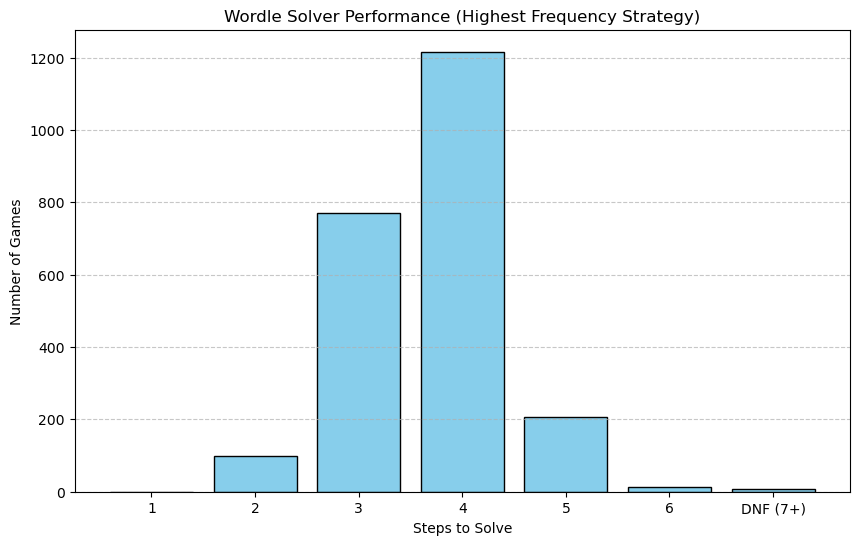

In [6]:
import main as gameEngine
import matplotlib.pyplot as plt
import numpy as np
import time
import math # gameEngine uses math, so it's good to have

# Ensure matplotlib plots are shown inline in the notebook
%matplotlib inline

# This function is a silent version of the solver, designed to return only the step count
def solve_specific_word_for_stats(target_word, game_engine, initial_word_list):
    """Solves for a target word and returns the number of steps (7 for DNF)."""
    available_words = initial_word_list[:] # Use a fresh copy
    steps = 0

    # --- First Guess ---
    guess = "salet"
    steps = 1
    if guess == target_word:
        return steps
    available_words = game_engine.filter_words(available_words, guess, target_word)
    if target_word not in available_words and len(available_words) > 0:
         # This check is for debugging the filter_words logic, if needed
         # print(f"Warning: Target {target_word} filtered out by {guess}")
         pass

    # --- Subsequent Guesses (Loop) ---
    for j in range(5): # Max 5 more guesses (total 6)
        if not available_words:
             return 7 # DNF (ran out of words)

        if len(available_words) == 1:
            guess = available_words[0]
        elif game_engine.isBlimp(available_words):
            # print(f"Blimp detected for {target_word} with list: {available_words}")
            guess = game_engine.blimpSearch(available_words)
        else:
            guess = game_engine.getMaxValue1(available_words)

        steps += 1
        if guess == target_word:
            return steps

        available_words = game_engine.filter_words(available_words, guess, target_word)
        if target_word not in available_words and len(available_words) > 0:
            # print(f"Warning: Target {target_word} filtered out by {guess}")
            pass

    # --- End of Loop ---
    # If it exits the loop, it failed in 6 steps
    return 7 # DNF (6 guesses used, no match)


# --- Main Execution ---
print("Starting full simulation for all words in words.txt...")
print("This may take several minutes.")

# Load lists
permanent_answers = [i[:-1] for i in open("words.txt", "r").readlines()]
gameEngine.available_words = permanent_answers[:] # Ensure gameEngine has the right list for its functions
gameEngine.permanent_answers = permanent_answers[:]
gameEngine.wordsAllowed = [i[:-1] for i in open("wordsAllowed.txt", "r").readlines()]

results = []
start_time = time.time()
total_words = len(permanent_answers)

for i, word in enumerate(permanent_answers):
    if (i+1) % 200 == 0:
        print(f"... processed {i+1}/{total_words} words ...")
    
    # Pass the full list so the function can make a fresh copy
    steps = solve_specific_word_for_stats(word, gameEngine, permanent_answers)
    results.append(steps)
            
end_time = time.time()
print(f"\nSimulation complete. Processed {total_words} words in {end_time - start_time:.2f} seconds.")

# --- Analysis & Plotting ---
print("Generating histogram...")

results_array = np.array(results)

# Get counts for 1-6 steps and DNF (7)
success_games = results_array[results_array <= 6]
dnf_count = np.count_nonzero(results_array == 7)
total_games = len(results_array)

if total_games > 0:
    success_rate = len(success_games) / total_games
    avg_steps = np.mean(success_games) if len(success_games) > 0 else 0
    
    print(f"--- Overall Stats ---")
    print(f"Total Games: {total_games}")
    print(f"Success Rate: {success_rate * 100:.2f}%")
    print(f"Failed Games (DNF): {dnf_count}")
    print(f"Average Steps (on success): {avg_steps:.4f}")
    
    # Print distribution
    print("\nDistribution of Guesses:")
    for i in range(1, 8):
        count = np.count_nonzero(results_array == i)
        label = f"DNF (7)" if i == 7 else f"{i} Steps"
        print(f"  {label}: {count} games")

# Create the histogram
# Bins: 1, 2, 3, 4, 5, 6, 7 (DNF)
# We want bins centered on the integers. 
bins = np.arange(1, 9) # Edges are 1, 2, 3, 4, 5, 6, 7, 8

plt.figure(figsize=(10, 6))
plt.hist(results_array, bins=bins, align='left', edgecolor='black', rwidth=0.8, color='skyblue')

plt.title('Wordle Solver Performance (Highest Frequency Strategy)')
plt.xlabel('Steps to Solve')
plt.ylabel('Number of Games')

# Set x-ticks to be meaningful
tick_labels = [str(i) for i in range(1, 7)] + ['DNF (7+)']
plt.xticks(ticks=np.arange(1, 8), labels=tick_labels)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
